In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
casas = pd.DataFrame(data['data'])
casas.columns = data['feature_names']
casas['MedHouseVal'] = data['target']
display(casas)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X = casas['MedInc']
Y = casas['MedHouseVal']
#separando meus dados nas duas variáveis (x - independente), (y - target)

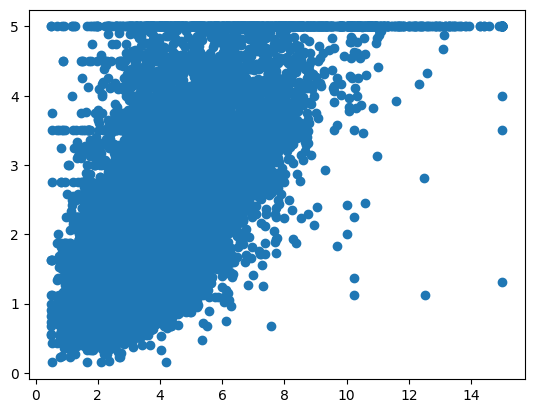

In [ ]:
plt.scatter(X,Y)
plt.show()

In [ ]:
casas['y_reta'] = X
display(casas)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,y_reta
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,8.3252
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,8.3014
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,7.2574
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,5.6431
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.8462
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.5603
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,2.5568
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1.7000
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1.8672


In [ ]:
 r = ss.pearsonr(casas['MedInc'],casas['MedHouseVal'])
 print(r)
 #correlação forte e positiva

 sh = ss.shapiro(casas['MedInc'].head(30))
 print(ss)

PearsonRResult(statistic=0.6880752079585478, pvalue=0.0)
<module 'scipy.stats' from '/usr/local/lib/python3.10/dist-packages/scipy/stats/__init__.py'>


In [ ]:
#separando os dados para teste e para treino
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.7, test_size=0.3, shuffle=False
)

reg = LinearRegression().fit(X_train.values.reshape(-1, 1), Y_train)

In [ ]:
#avaliando o erro da reta
from sklearn.metrics import r2_score

y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_squared_error(Y_test, y_pred))
print(mean_absolute_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))

#a regressão linear não conseguiu explicar muito bem meus dados
#daqui para frente é verificar cada coluna do dataset para verificar qual explica melhor meu y, quais tem menor % de error e um R2 maior

0.8338359385911366
0.6790707880165282
0.42426945274909933


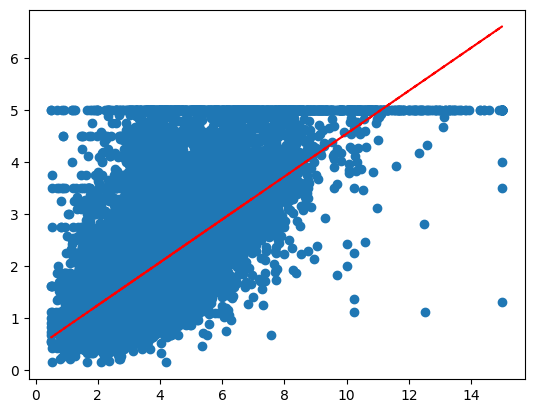

In [ ]:
plt.scatter(X,Y)
plt.plot(X_test, y_pred, '--r')
plt.show()


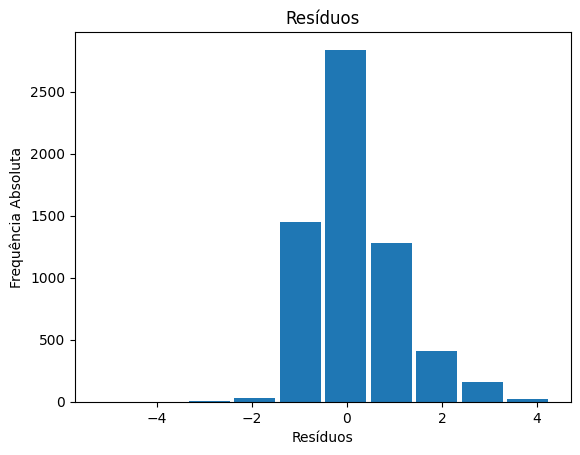

In [ ]:
residual = Y_test - y_pred
plt.hist(residual, rwidth=0.9)
plt.title('Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência Absoluta')
plt.show()